# **Laboratorium 3 - Równania Nieliniowe**


## **1. Wprowadzenie**  
Celem tego laboratorium jest implementacja i analiza trzech metod numerycznych służących do znajdowania miejsc zerowych funkcji:

- **Metoda bisekcji** (ang. *Bisection method*)  
- **Metoda Newtona** (ang. *Newton's method*)  
- **Metoda siecznych** (ang. *Secant method*)  

Zostaną one zastosowane do trzech funkcji testowych w różnych przedziałach i dla różnych wartości precyzji. Analizowana będzie liczba iteracji potrzebna do uzyskania określonej dokładności.

In [4]:
import numpy as np
import math 
import mpmath as mp
import matplotlib.pyplot as plt

## **2. Funkcje testowe**  

In [ ]:
def f1(x):
    return (np.cos(x)*np.cosh(x)) - 1
def f2(x):
    return (1/x - np.tan(x))
def f3(x):
    return 2**(-x) + (np.e)**x + 2*np.cos(x) - 6

In [32]:
def f1prime(x):
  return np.cos(x)*np.sinh(x) -np.sin(x)*np.cosh(x)
def f2prime(x):
    return -1 / (x ** 2) - 1 / (np.cos(x) ** 2)
def f3prime(x):
    return np.e ** x - (2 ** -x) * np.log(2) - 2 * np.sin(x)

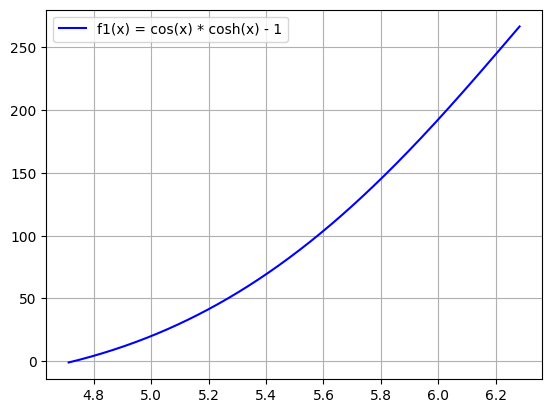

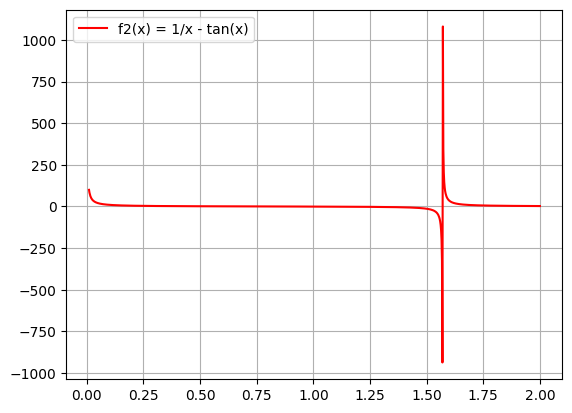

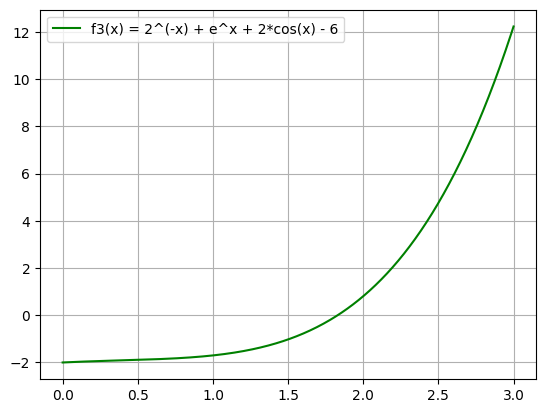

In [71]:
def plot_functions():
    xlist2 = np.linspace(0.01, 2, 1000)
    xlist1 = np.linspace(3*math.pi/2, 2*math.pi, 400)
    xlist3 = np.linspace(0,3, 400)
    
    plt.plot(xlist1, f1(xlist1), label='f1(x) = cos(x) * cosh(x) - 1', color='b')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.plot(xlist2, f2(xlist2), label='f2(x) = 1/x - tan(x)', color='r')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.plot(xlist3, f3(xlist3), label='f3(x) = 2^(-x) + e^x + 2*cos(x) - 6', color='g')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_functions()


## **3. Implementacja metod numerycznych**  

### **3.1 Metoda bisekcji**  
Metoda bisekcji jest iteracyjnym algorytmem, który działa poprzez dzielenie przedziału na połowy i wybieranie tej, w której występuje zmiana znaku. Warunkiem stopu jest osiągnięcie określonej dokładności.

**Parametry:**  
- Krańce przedziału \( [a, b] \)
- Dokładność \( epsilon )  
- Maksymalna liczba iteracji  

**Zwracane wartości:**  
- Wyznaczone miejsce zerowe  
- Liczba iteracji  

In [74]:
def bisection(f,a, b, delta, precyzja=50):
    
    mp.mp.dps = precyzja
        
    max_iter = 100
    iter = 0
    for k in range(1, max_iter):
        iter += 1
        x = a + (b-a)/2
        if abs(f(x)) < delta:
            break
        else:
            if np.sign(f(x)) * np.sign(f(a)) < 0:
                b = x
            else:
                a = x
    return x, iter

### **3.2 Metoda Newtona**  
Metoda Newtona wykorzystuje pochodną funkcji do iteracyjnego przybliżania pierwiastka. Przy odpowiednim wyborze punktu startowego zapewnia bardzo szybkie zbieganie.

**Parametry:**  
- Punkt startowy \( x_0 \)  
- Dokładność \( epsilon )  
- Maksymalna liczba iteracji  

**Zwracane wartości:**  
- Wyznaczone miejsce zerowe  
- Liczba iteracji  

In [34]:
def newton_method(f, df, x0, epsilon=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        new = x - f(x) / df(x)
        if f(x) < epsilon:
            return new, i + 1 
        x = new
    print("nie eudana próba")

### **3.3 Metoda siecznych**  
Metoda siecznych działa podobnie do Newtona, ale zamiast pochodnej używa różnic skończonych, co czyni ją bardziej uniwersalną.

**Parametry:**  
- Dwa początkowe punkty \( x_0, x_1 \)  
- Dokładność \( epsilon )  
- Maksymalna liczba iteracji  

**Zwracane wartości:**  
- Wyznaczone miejsce zerowe  
- Liczba iteracji  

In [35]:
def secant_method(f,a,b,epsilon=1e-10):
    iter = 0
    x = a
    y = b
    while True:
        iter += 1
        if abs(f(x)) < epsilon or (f(y) - f(x)) == 0:
            return x, iter
        temp = (f(y) * x - f(x) * y) / (f(y) - f(x))
        x = y
        y = temp

## **4. Analiza wyników**  
Dla każdej z metod zostanie wykonana analiza zbieżności dla różnych wartości \( epsilon \). Porównamy liczbę iteracji potrzebną do osiągnięcia określonej dokładności.  

epsilon = 1e-10 

wynik, iteracje = bisection(f1, 3*math.pi/2, 2*math.pi, epsilon, precyzja)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = bisection(f2, 0.01, math.pi/2, epsilon, precyzja)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = bisection(f3, 1,3, epsilon, precyzja)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

In [37]:
wynik, iteracje = newton_method(f1, f1prime, 2*math.pi)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = newton_method(f2, f2prime, 0.001)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = newton_method(f3, f3prime,2)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

Miejsce zerowe: 4.730040744862704, liczba iteracji: 7
Miejsce zerowe: 0.8603335890193797, liczba iteracji: 13
Miejsce zerowe: 1.829383601933849, liczba iteracji: 5


In [38]:
wynik, iteracje = secant_method(f1, 3*math.pi/2, 2*math.pi)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = secant_method(f2, 0.01, math.pi/2)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

wynik, iteracje = secant_method(f3, 1,3)
print(f"Miejsce zerowe: {wynik}, liczba iteracji: {iteracje}")

Miejsce zerowe: 4.730040744862704, liczba iteracji: 8
Miejsce zerowe: 0.8603335890193796, liczba iteracji: 18
Miejsce zerowe: 1.8293836019411394, liczba iteracji: 11


## **5. Wizualizacja wyników**  
Dla każdej funkcji testowej zostanie narysowany wykres przedstawiający zależność liczby iteracji od wartości dokładności \( epsilon \). 

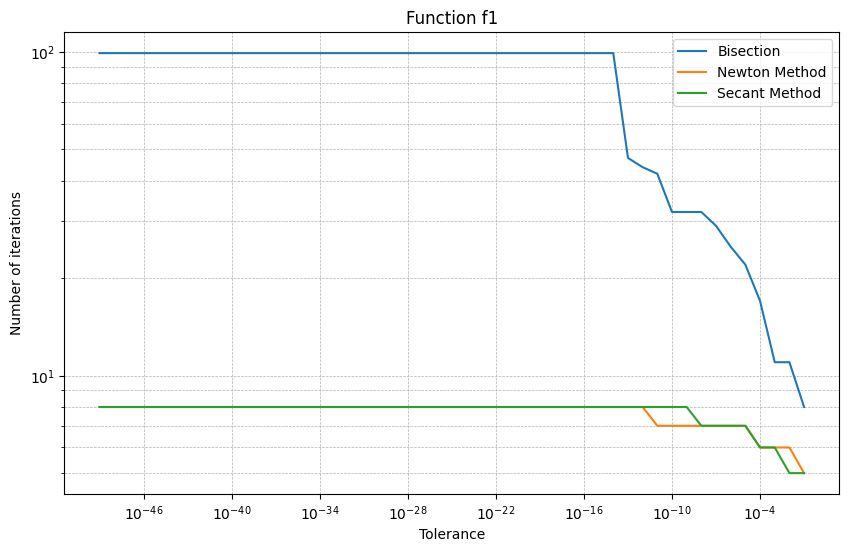

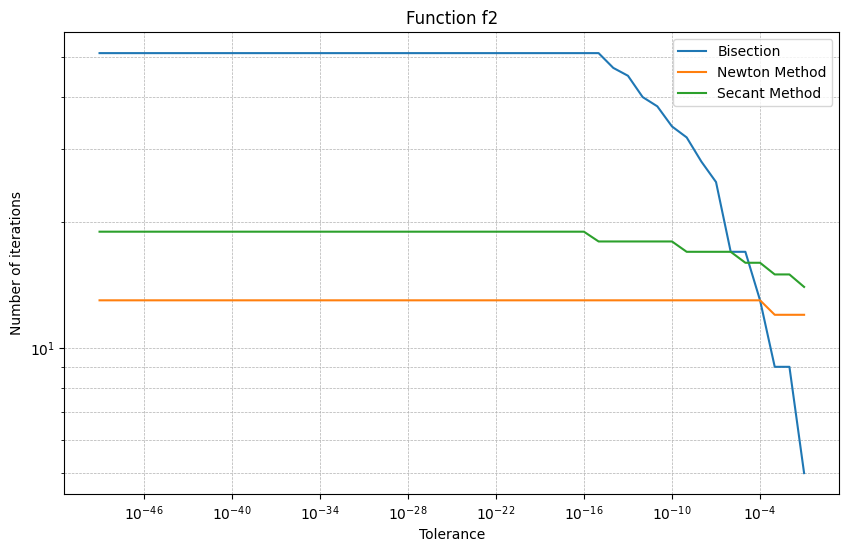

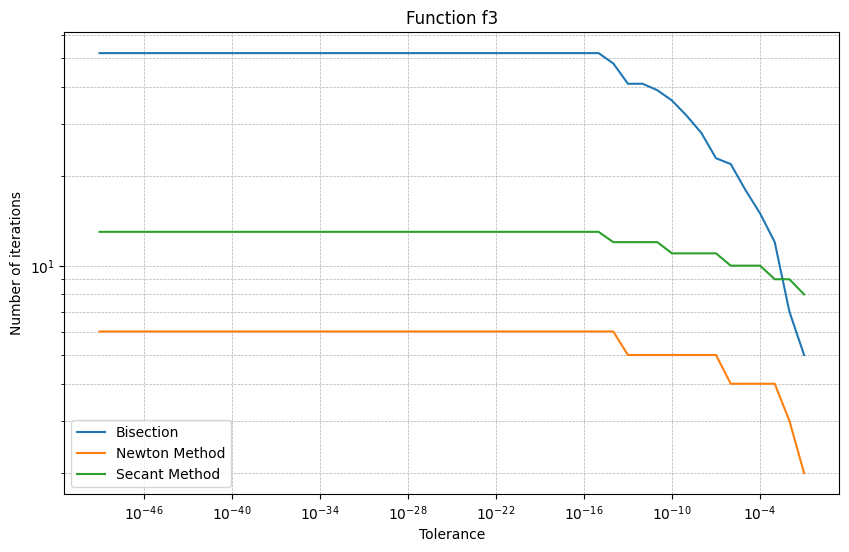

In [79]:
def test_function(f, fprim, x0, a, b, method, epsilons):
    iterations = []
    for eps in epsilons:
        if method == bisection:
            _, iters = bisection(f, a, b, eps)
        elif method == newton_method:
            _, iters = newton_method(f, fprim, x0, epsilon=eps)
        else:
            _, iters = secant_method(f, a, b, eps)
        iterations.append(iters)
    return iterations

def plot_iterations(f, fprime, a, b, x0, title):
    epsilons = [10**i for i in range(-1, -50, -1)] 
    
    iters_bisection = test_function(f, fprime, x0, a, b, bisection, epsilons)
    iters_newton = test_function(f, fprime, x0, 0, 0, newton_method, epsilons)
    iters_secant = test_function(f, fprime, x0, a, b, secant_method, epsilons)
    
    plt.figure(figsize=(10, 6))
    plt.loglog(epsilons, iters_bisection, label="Bisection")
    plt.loglog(epsilons, iters_newton, label="Newton Method")
    plt.loglog(epsilons, iters_secant, label="Secant Method")
    
    plt.xlabel("Tolerance")
    plt.ylabel("Number of iterations")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


def plot_all():
    plot_iterations(f1, f1prime, 3*math.pi/2, 2*math.pi, 2*math.pi, "Function f1")
    plot_iterations(f2, f2prime, 0.01, math.pi/2, 0.001, "Function f2")
    plot_iterations(f3, f3prime, 1, 3, 2, "Function f3")

plot_all()
